In [1]:
# Modulo para ler arquivos .pdn
# disponivel em: https://github.com/addisonElliott/pypdn
import pypdn

# Modulos auxiliares usados
from Modulos.modulos_auxiliares import *

In [2]:
def plot_graph_new(x, y, label, method):
    plt.figure(figsize = (15, 4))
    for i in range(len(label)):
        plt.subplot(1, 3, 1)
        plt.title('IOU values ' + method.upper())
        plt.plot(x, y[0][i], label=f'{label[i]}')
        plt.xlabel('Noise treatment')
        plt.ylabel("IOU values")
        plt.legend(fontsize = 'x-small', title = 'noise_aplication', title_fontsize = 'x-small')
        
        plt.subplot(1, 3, 2)
        plt.title('True Positive rate values ' + method.upper())
        plt.plot(x, y[1][i], label=f'{label[i]}')
        plt.xlabel('Noise treatment')
        plt.ylabel("Sensibility values")
        plt.legend(fontsize = 'x-small', title = 'noise_aplication', title_fontsize = 'x-small')
        
        plt.subplot(1, 3, 3)
        plt.title('Precision values ' + method.upper())
        plt.plot(x, y[2][i], label=f'{label[i]}')
        plt.xlabel('Noise treatment')
        plt.ylabel("Precision values")
        plt.legend(fontsize = 'x-small', title = 'noise_aplication', title_fontsize = 'x-small')
    return

# Importando a amostra

In [3]:
# nome = '3783.pdn'
# nome = '6769.pdn'
#nome = '9234.pdn'
# nome = '10394.pdn'
# nome = '12795.pdn'
nome = '17924.pdn'
nome = "../Amostras/Bach1/" + nome

img = pypdn.read(nome)

#print(img)

## Imagem original da amostra

In [4]:
# dividir as camadas da imagem
img_original = img.layers[0].image

#print(img_original.shape)
#plt.imshow(img_original)

## Segmentação binaria

In [5]:
segmentation = img.layers[1].image
#print(segmentation.shape)
segmentation = transform_nonbinary(segmentation[:,:,0])
#print(im.Image(segmentation))

# Aumentando o tamanho da imagem para o algoritmo manter segmento da imagem

segmentation = np.pad(segmentation, ((10,10), (10,10)), constant_values = True)

#plt.imshow(segmentation)

## Importando o esqueleto feito a mão

In [6]:
skeleton = img.layers[3].image
#print(im.Image(skeleton))


skeleton = skeleton[:,:,2]

skeleton = transform_nonbinary(skeleton)
#print(im.Image(skeleton))

#print(skeleton)
#plt.imshow(skeleton)

## Metricas comparativas dos esqueletos

# Adicionando ruido

In [7]:
noise_aplication = [0., 0.05, 0.1, 0.15, 0.2, 0.25]
noise_treatment = [0, 1, 2, 3, 4, 5, 6]

method = ['palagyi', 'zhang', 'lee', 'medial_axis']
data = {}

for metodo in method:
    data[metodo] = compare_skeleton(skeleton, segmentation, noise_aplication, noise_treatment, metodo)
#print(data)

tp precision:  3513 tp sensibility:  3526 
fp precision:  323 fn sensibility:  303 

tp precision:  3265 tp sensibility:  3477 
fp precision:  235 fn sensibility:  352 

tp precision:  3261 tp sensibility:  3472 
fp precision:  223 fn sensibility:  357 

tp precision:  3246 tp sensibility:  3461 
fp precision:  196 fn sensibility:  368 

tp precision:  3227 tp sensibility:  3442 
fp precision:  181 fn sensibility:  387 

tp precision:  3177 tp sensibility:  3388 
fp precision:  167 fn sensibility:  441 

tp precision:  3118 tp sensibility:  3327 
fp precision:  154 fn sensibility:  502 

tp precision:  3082 tp sensibility:  3289 
fp precision:  148 fn sensibility:  540 


******** NOISE: 0.0 , METHOD: palagyi ********
iou:  0.8489928838499577 sensibility 0.9208670671193523 
precision: 0.9157977059436914 


tp precision:  3529 tp sensibility:  3525 
fp precision:  433 fn sensibility:  304 

tp precision:  3265 tp sensibility:  3479 
fp precision:  312 fn sensibility:  350 

tp precision

tp precision:  3299 tp sensibility:  3410 
fp precision:  1132 fn sensibility:  419 

tp precision:  3217 tp sensibility:  3359 
fp precision:  1012 fn sensibility:  470 

tp precision:  3127 tp sensibility:  3315 
fp precision:  828 fn sensibility:  514 

tp precision:  3001 tp sensibility:  3225 
fp precision:  655 fn sensibility:  604 

tp precision:  2910 tp sensibility:  3159 
fp precision:  568 fn sensibility:  670 

tp precision:  2880 tp sensibility:  3138 
fp precision:  516 fn sensibility:  691 

tp precision:  2790 tp sensibility:  3068 
fp precision:  436 fn sensibility:  761 


******** NOISE: 0.2 , METHOD: zhang ********
iou:  0.6452837007589447 sensibility 0.9044136850352572 
precision: 0.6973085670962851 


tp precision:  3771 tp sensibility:  3488 
fp precision:  2123 fn sensibility:  341 

tp precision:  3376 tp sensibility:  3434 
fp precision:  1580 fn sensibility:  395 

tp precision:  3291 tp sensibility:  3385 
fp precision:  1445 fn sensibility:  444 

tp precis

tp precision:  2978 tp sensibility:  3364 
fp precision:  450 fn sensibility:  465 

tp precision:  2929 tp sensibility:  3319 
fp precision:  331 fn sensibility:  510 

tp precision:  2893 tp sensibility:  3289 
fp precision:  276 fn sensibility:  540 

tp precision:  2820 tp sensibility:  3219 
fp precision:  253 fn sensibility:  610 


******** NOISE: 0.1 , METHOD: medial_axis ********
iou:  0.6103766525318034 sensibility 0.9320971533037347 
precision: 0.6442356959863365 


tp precision:  3813 tp sensibility:  3572 
fp precision:  2464 fn sensibility:  257 

tp precision:  3241 tp sensibility:  3486 
fp precision:  1534 fn sensibility:  343 

tp precision:  3163 tp sensibility:  3445 
fp precision:  1301 fn sensibility:  384 

tp precision:  3053 tp sensibility:  3379 
fp precision:  882 fn sensibility:  450 

tp precision:  2966 tp sensibility:  3332 
fp precision:  618 fn sensibility:  497 

tp precision:  2918 tp sensibility:  3302 
fp precision:  487 fn sensibility:  527 

tp pr

In [8]:
# [0.8423540534152683, 0.8144920889704196], [0.9334029772786628, 0.9297466701488639], [0.8961169944528492, 0.8677766895200784]

In [9]:
iou_palagyi, tpr_palagyi, ppv_palagyi = data['palagyi'][0]
iou_graph_palagyi, tpr_graph_palagyi, ppv_graph_palagyi = data['palagyi'][1]

iou_zhang, tpr_zhang, ppv_zhang = data['zhang'][0]
iou_graph_zhang, tpr_graph_zhang, ppv_graph_zhang = data['zhang'][1]

iou_lee, tpr_lee, ppv_lee = data['lee'][0]
iou_graph_lee, tpr_graph_lee, ppv_graph_lee = data['lee'][1]

iou_MA, tpr_MA, ppv_MA = data['medial_axis'][0]
iou_graph_MA, tpr_graph_MA, ppv_graph_MA = data['medial_axis'][1]

#print(data['medial_axis'][1][0] == iou_graph_MA)

## plotando os graficos de qualidade

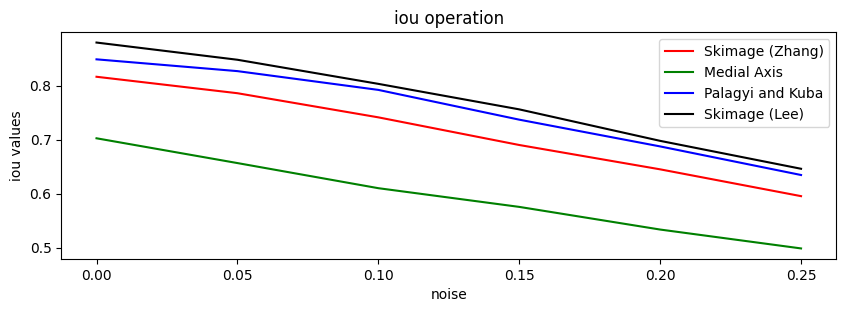

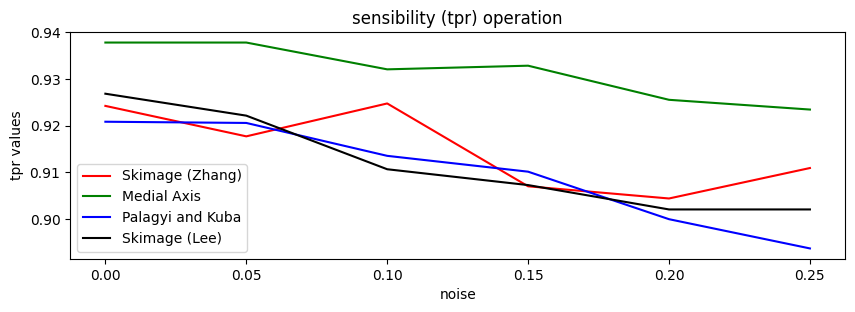

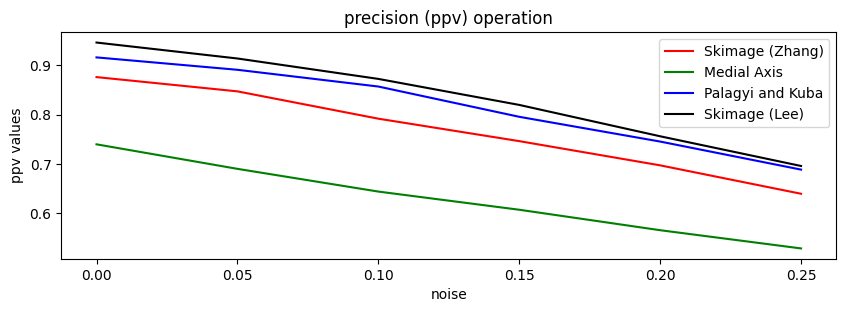

In [10]:
plt.figure(figsize = [10,10])
plt.subplot(3,1,1)
plot_graph((iou_zhang, iou_MA, iou_palagyi, iou_lee), ('Skimage (Zhang)', 'Medial Axis', 'Palagyi and Kuba', 'Skimage (Lee)'), 'iou values', 'iou operation', noise_aplication, ('r', 'g', 'b', 'k'))

plt.figure(figsize = [10,10])
plt.subplot(3,1,2)
plot_graph((tpr_zhang, tpr_MA, tpr_palagyi, tpr_lee), ('Skimage (Zhang)', 'Medial Axis', 'Palagyi and Kuba', 'Skimage (Lee)'), 'tpr values', 'sensibility (tpr) operation', noise_aplication, ('r', 'g', 'b', 'k'))

plt.figure(figsize = [10,10])
plt.subplot(3,1,3)
plot_graph((ppv_zhang, ppv_MA, ppv_palagyi, ppv_lee), ('Skimage (Zhang)', 'Medial Axis', 'Palagyi and Kuba', 'Skimage (Lee)'), 'ppv values', 'precision (ppv) operation', noise_aplication, ('r', 'g', 'b', 'k'))

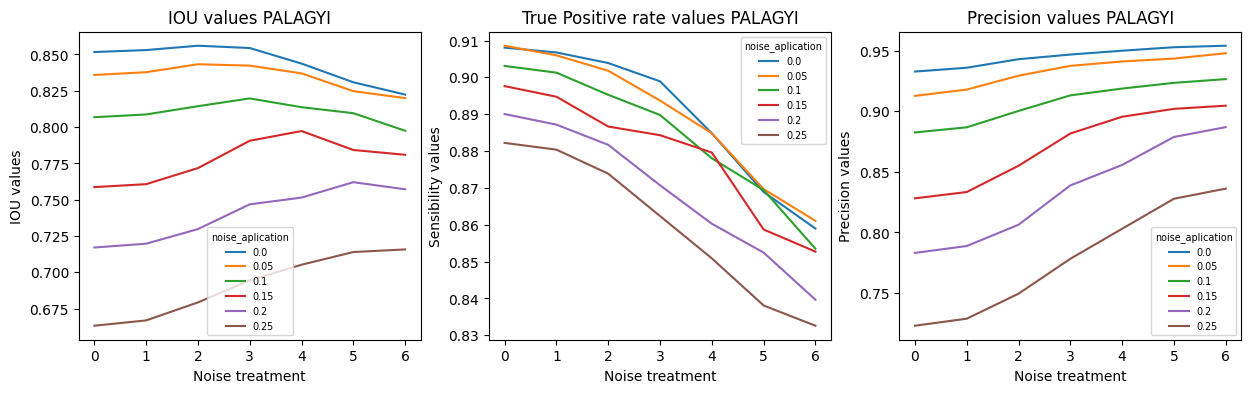

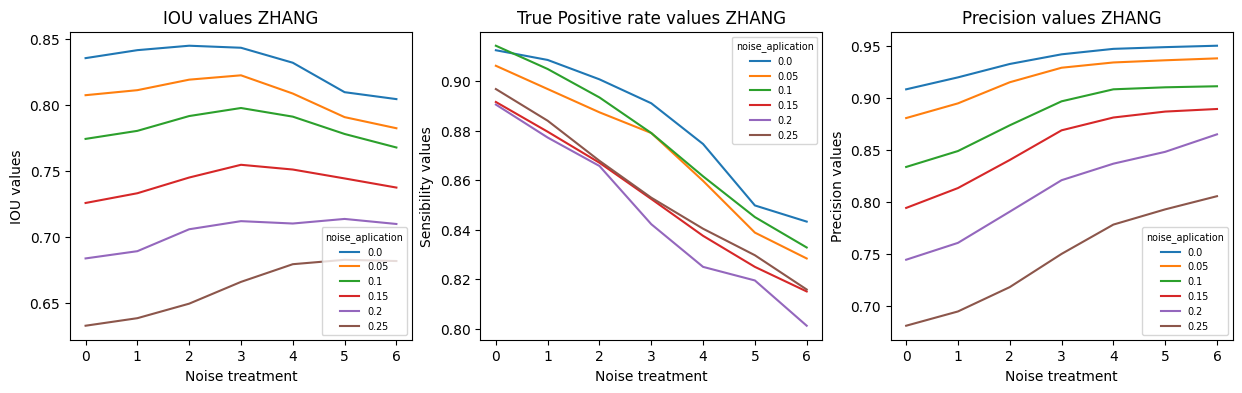

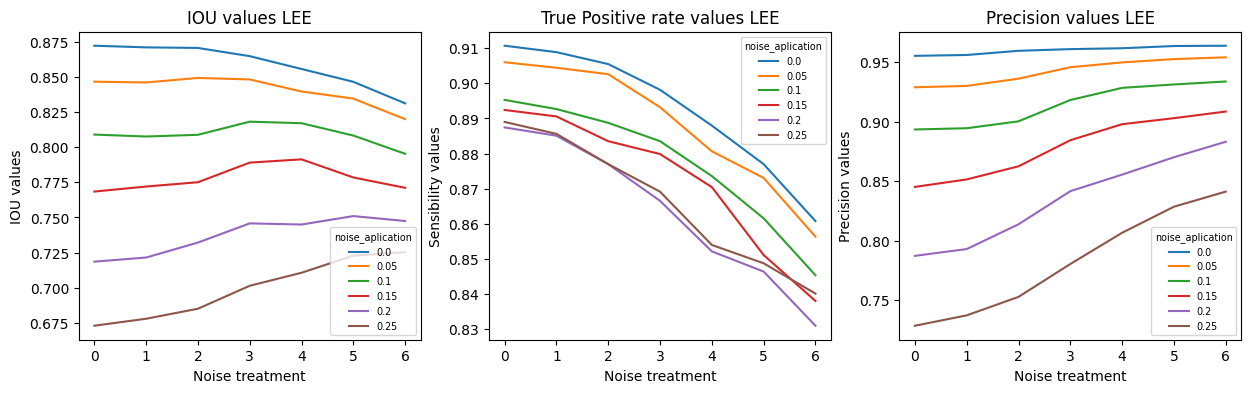

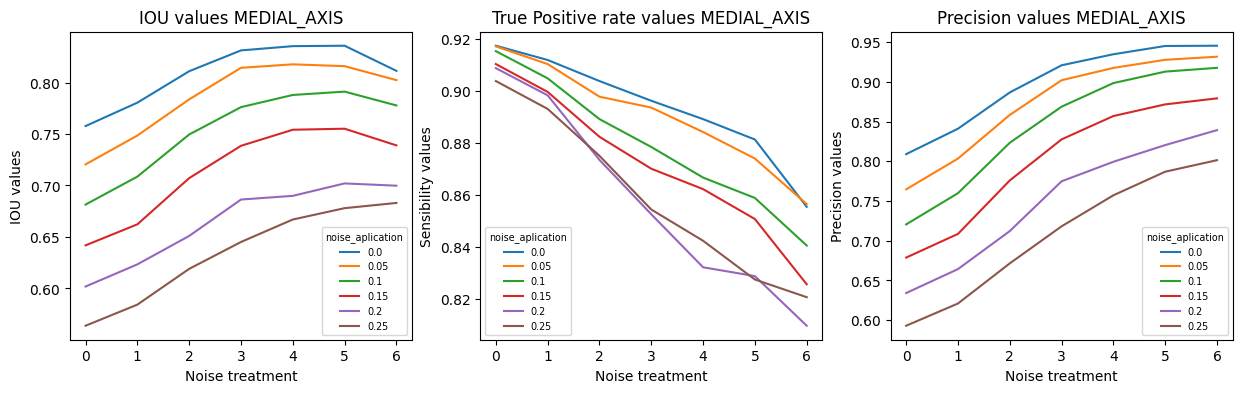

In [11]:
for metodo in method:
    plot_graph_new(noise_treatment, data[metodo][1], noise_aplication, metodo)

In [12]:
for i in ppv_graph_lee:
    print(i, '\n')

[0.9554325662685698, 0.9561531715872552, 0.959658421672556, 0.9610698365527489, 0.9618159951894167, 0.9636752136752137, 0.9639303482587065] 

[0.9290396124251924, 0.9301460062983109, 0.9362377380265435, 0.9458505002942907, 0.9499250374812593, 0.9526842584167425, 0.9541653762774853] 

[0.893569844789357, 0.8946051167964405, 0.9003939223410242, 0.9183025404157044, 0.928529238038984, 0.9313873006319591, 0.9338665026145802] 

[0.8452950558213717, 0.8515834675254965, 0.8626058453974323, 0.8845181230682776, 0.8979827089337176, 0.903053661428995, 0.9086232980332829] 

[0.787366326784382, 0.7930688096433953, 0.813893208916537, 0.8417051316861255, 0.8556179775280899, 0.87022681596325, 0.8832246591582691] 

[0.7286549707602339, 0.7373545476133935, 0.7528834355828221, 0.7805128205128206, 0.8067658998646821, 0.8286674132138858, 0.8413337165852256] 

